In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import pandas as pd 

---

# Data Distribution 

In [2]:
ds_path = '/home/kevinteng/Desktop/chest_xray'
files = os.listdir(ds_path)
print(files)

['train', 'test', 'val']


Checking the number of patients/images

In [23]:
split_list = []
for split in files:
    read_pth = os.path.join(ds_path, split)
    # normal or pneumonia 
    variation_dir = sorted(os.listdir(read_pth))
    no_patients = np.zeros(len(variation_dir), dtype=int)
    for i, variation in enumerate(variation_dir):
        # output classes 
        class_pth = os.path.join(read_pth, variation)
        # validate the number of patients,
        # check duplicates with set 
        patients = len(set(os.listdir(class_pth)))
        no_patients[i] = patients
    split_list.append(no_patients)
    
split_arr = np.array(split_list)
# data set dataframe
ds_df = pd.DataFrame({'Splits': files, 'Normal': split_arr[:,0], 
                      'Pneumonia': split_arr[:,1], 
                      'Total': split_arr[:,0]+split_arr[:,1]})
print(ds_df)
print("Total number of patients: ", ds_df['Normal'].sum()+ds_df['Pneumonia'].sum())

  Splits  Normal  Pneumonia  Total
0  train    1341       3875   5216
1   test     234        390    624
2    val       8          8     16
Total number of patients:  5856


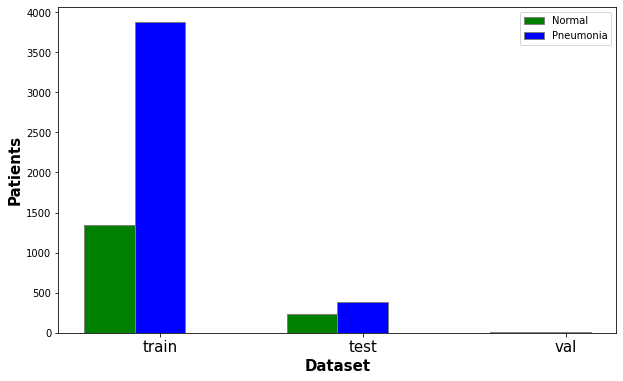

In [4]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
data = np.stack([split_arr[i] for i in range(split_arr.shape[0])]).T 
 
# Set position of bar on X axis
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, data[0], color ='g', width = barWidth,
        edgecolor ='grey', label ='Normal')
plt.bar(br2, data[1], color ='b', width = barWidth,
        edgecolor ='grey', label ='Pneumonia')
 
# Adding Xticks
plt.xlabel('Dataset', fontweight ='bold', fontsize = 15)
plt.ylabel('Patients', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(3)],
        ['train', 'test', 'val'], fontsize = 15)
 
plt.legend()
plt.show()

---

# Image Size

In [5]:
# loop through train, test, val 
normal_img_size = []
pneumonia_img_size = []
for split in files:
    read_pth = os.path.join(ds_path, split)
    # loop through normal or pneumonia 
    variation_dir = sorted(os.listdir(read_pth))
    for variation in variation_dir:
        # output classes 
        class_pth = os.path.join(read_pth, variation)
        # validate the number of patients,
        patients = list(set(os.listdir(class_pth)))
        # store image size for each images in the directory 
        for p in patients:
            if variation.lower() == 'normal':
                normal_img_size.append(cv2.imread(os.path.join(class_pth, p)).shape[:2])
            else:
                pneumonia_img_size.append(cv2.imread(os.path.join(class_pth, p)).shape[:2])                                                                 

In [6]:
normal_hw_df = pd.DataFrame({'Height': np.array(normal_img_size)[:, 0], 
                             'Width': np.array(normal_img_size)[:, 1]})
print(normal_hw_df.describe())

            Height        Width
count  1583.000000  1583.000000
mean   1378.648768  1686.379659
std     343.017920   305.316210
min     496.000000   912.000000
25%    1140.000000  1472.000000
50%    1323.000000  1654.000000
75%    1554.000000  1848.000000
max    2713.000000  2916.000000


In [7]:
pneumonia_hw_df = pd.DataFrame({'Height': np.array(pneumonia_img_size)[:, 0], 
                                'Width': np.array(pneumonia_img_size)[:, 1]})
print(pneumonia_hw_df.describe())

            Height        Width
count  4273.000000  4273.000000
mean    819.553943  1195.069272
std     270.861725   285.145232
min     127.000000   384.000000
25%     640.000000  1000.000000
50%     776.000000  1160.000000
75%     960.000000  1360.000000
max    2304.000000  2772.000000


---

# Visualisation
Pick training dataset for visualisation

In [8]:
new_size = (512, 512)
normal_imgs = []
pneumonia_imgs = []
for split in files:
    if split.lower() == 'train':
        read_pth = os.path.join(ds_path, split)
        # loop through normal or pneumonia 
        variation_dir = sorted(os.listdir(read_pth))
        for variation in variation_dir:
            # output classes 
            class_pth = os.path.join(read_pth, variation)
            # validate the number of patients,
            patients = list(set(os.listdir(class_pth)))
            # store image size for each images in the directory 
            for p in range(5):
                if variation.lower() == 'normal':
                    normal_imgs.append(cv2.resize(cv2.imread(os.path.join(class_pth, patients[p])), new_size))
                else:
                    pneumonia_imgs.append(cv2.resize(cv2.imread(os.path.join(class_pth, patients[p])), new_size))

In [9]:
def plot_comparison(input_img, caption=None, plot=True, save_path=None, save_name=None, save_as='png',
                    save_dpi=300, captions_font = 20, n_row=1, n_col=2,
                    figsize=(5, 5), cmap='gray'):
    '''
    Plot comparison of multiple image but only in column wise!
    :param input_img: Input image list
    :param caption: Input caption list
    :param save_path: Path to save plot
    :param save_name: Name to be save for plot
    :param: save_as: plot save extension, 'png' by DEFAULT
    :param n_row: Number of row is 1 by DEFAULT
    :param n_col: Number of columns
    :param figsize: Figure size during plotting (5,5) by DEFAULT
    :return: Plot of (n_row, n_col)
    '''
    print()
    if caption is not None:
        assert len(caption) == len(input_img), "Caption length and input image length does not match"
    assert len(input_img) == n_col, "Error of input images or number of columns!"

    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.subplots_adjust(hspace=0.4, wspace=0.4, right=0.7)

    for i in range(n_col):
        axes[i].imshow(np.squeeze(input_img[i]), cmap=cmap)
        if caption is not None:
            axes[i].set_xlabel(caption[i], fontsize=captions_font)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path+'{}.{}'.format(save_name, save_as), save_dpi=save_dpi)
    if plot:
        plt.show()
    else:
        return fig

## Normal Images

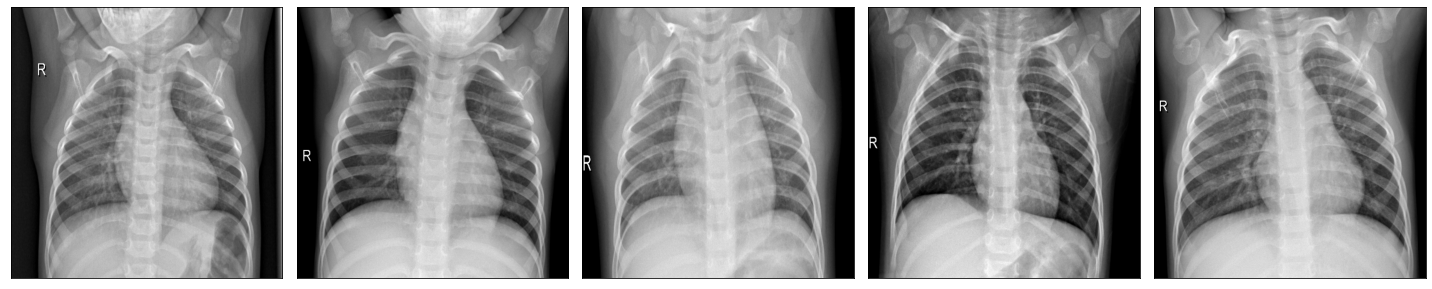

In [10]:
plot_comparison(normal_imgs, None, n_col=len(normal_imgs), figsize=(20,20), cmap=None)

In [11]:
print("Max: {}".format(np.max(normal_imgs)))
print("Min: {}".format(np.min(normal_imgs)))

Max: 255
Min: 0


## Pneumonia Images

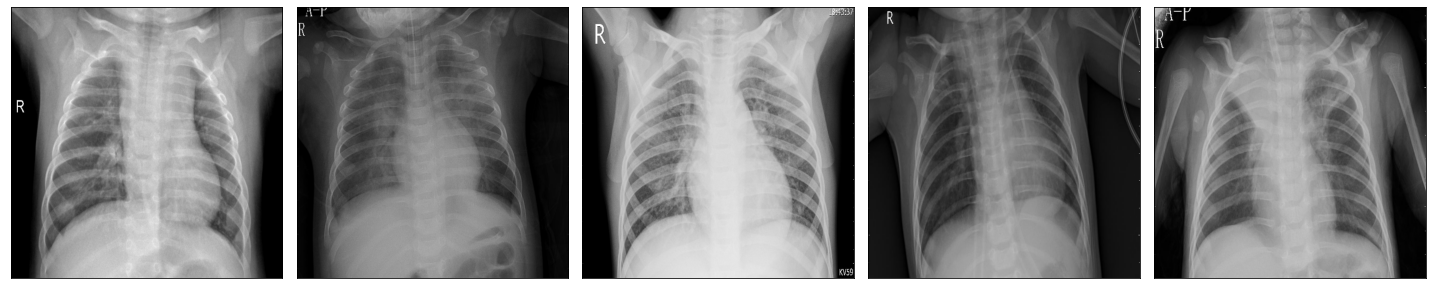

In [12]:
plot_comparison(pneumonia_imgs, None, n_col=len(normal_imgs), figsize=(20,20), cmap=None)

# Create CSV file for easy loading

In [13]:
folds = [] # if it belongs to train, val or test sets
classes = []
labels = []
name = []
path = []

for split in files:
    read_pth = os.path.join(ds_path, split)
    # loop through normal or pneumonia 
    variation_dir = sorted(os.listdir(read_pth))
    for variation in variation_dir:
        # output classes 
        class_pth = os.path.join(read_pth, variation)
        # validate the number of patients,
        patients = list(set(os.listdir(class_pth)))
        # store image size for each images in the directory 
        for p in patients:
            if split.lower() == 'train':
                folds.append(1)
            elif split.lower() == 'val':
                folds.append(-1)
            else:
                folds.append(0)
            # path without root path 
            path.append(split+'/'+variation+'/'+p)
            name.append(p.split('.')[0])
            classes.append(variation.lower())
            if variation.lower() == 'normal':
                labels.append(0)
            else:
                labels.append(1)

In [14]:
df_csv = pd.DataFrame({ 'Name': name,
                        'Class': classes,
                        'Path': path,
                        'Label': labels,
                        'Fold': folds
                      })
print(df_csv.head())
df_csv.to_csv('cxr.csv', index=False)

                   Name   Class                                    Path  \
0          IM-0211-0001  normal          train/NORMAL/IM-0211-0001.jpeg   
1  NORMAL2-IM-1187-0001  normal  train/NORMAL/NORMAL2-IM-1187-0001.jpeg   
2  NORMAL2-IM-1141-0001  normal  train/NORMAL/NORMAL2-IM-1141-0001.jpeg   
3  NORMAL2-IM-0582-0001  normal  train/NORMAL/NORMAL2-IM-0582-0001.jpeg   
4  NORMAL2-IM-1197-0001  normal  train/NORMAL/NORMAL2-IM-1197-0001.jpeg   

   Label  Fold  
0      0     1  
1      0     1  
2      0     1  
3      0     1  
4      0     1  
